# Project: Investigate a soccer database by Michael Reda Adly Wassef

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

This soccer database comes from Kaggle. It contains data for soccer matches, players, and teams from several European countries from 2008 to 2016.

Questions to find answers for are:
- What teams improved the most over the time period? 
- Which players had the most penalties?
- What team attributes lead to the most victories?
- What are the top teams that win at home?
- What are the top teams that win away ?
- Top scoring teams
- Which foot is more prefered by soccer players?
- Does playing at home contributes in winning?
- What teams improved the most over the time period?

In [1]:
import pandas as pd 
% matplotlib inline

import numpy as np

UsageError: Line magic function `%` not found.


<a id='wrangling'></a>
## Data Wrangling

### General Properties

Merging the leagues dataframe with the countries using left joining on country_id

In [2]:
df_teams = pd.read_csv('data/Team.csv')
df_teams.head()

,id,team_api_id,team_fifa_api_id,team_long_name,team_short_name
0,1,9987,673.0,KRC Genk,GEN
1,2,9993,675.0,Beerschot AC,BAC
2,3,10000,15005.0,SV Zulte-Waregem,ZUL
3,4,9994,2007.0,Sporting Lokeren,LOK
4,5,9984,1750.0,KSV Cercle Brugge,CEB


In [3]:
df_teams_attr = pd.read_csv('data/Team_Attributes.csv')
df_teams_attr.head()

,id,team_fifa_api_id,team_api_id,date,buildUpPlaySpeed,buildUpPlaySpeedClass,buildUpPlayDribbling,buildUpPlayDribblingClass,buildUpPlayPassing,buildUpPlayPassingClass,...,chanceCreationShooting,chanceCreationShootingClass,chanceCreationPositioningClass,defencePressure,defencePressureClass,defenceAggression,defenceAggressionClass,defenceTeamWidth,defenceTeamWidthClass,defenceDefenderLineClass
0,1,434,9930,2010-02-22 00:00:00,60,Balanced,NaN,Little,50,Mixed,...,55,Normal,Organised,50,Medium,55,Press,45,Normal,Cover
1,2,434,9930,2014-09-19 00:00:00,52,Balanced,48.0,Normal,56,Mixed,...,64,Normal,Organised,47,Medium,44,Press,54,Normal,Cover
2,3,434,9930,2015-09-10 00:00:00,47,Balanced,41.0,Normal,54,Mixed,...,64,Normal,Organised,47,Medium,44,Press,54,Normal,Cover
3,4,77,8485,2010-02-22 00:00:00,70,Fast,NaN,Little,70,Long,...,70,Lots,Organised,60,Medium,70,Double,70,Wide,Cover
4,5,77,8485,2011-02-22 00:00:00,47,Balanced,NaN,Little,52,Mixed,...,52,Normal,Organised,47,Medium,47,Press,52,Normal,Cover


Merging the teams dataframe with the teams attributes using left joining on team_api_id


In [4]:
df_teams = pd.merge(left=df_teams, right=df_teams_attr, on='team_api_id', how='left',suffixes=('','_attr'))
df_teams.head()

,id,team_api_id,team_fifa_api_id,team_long_name,team_short_name,id_attr,team_fifa_api_id_attr,date,buildUpPlaySpeed,buildUpPlaySpeedClass,...,chanceCreationShooting,chanceCreationShootingClass,chanceCreationPositioningClass,defencePressure,defencePressureClass,defenceAggression,defenceAggressionClass,defenceTeamWidth,defenceTeamWidthClass,defenceDefenderLineClass
0,1,9987,673.0,KRC Genk,GEN,485.0,673.0,2010-02-22 00:00:00,45.0,Balanced,...,60.0,Normal,Organised,70.0,High,65.0,Press,70.0,Wide,Cover
1,1,9987,673.0,KRC Genk,GEN,486.0,673.0,2011-02-22 00:00:00,66.0,Balanced,...,51.0,Normal,Organised,48.0,Medium,47.0,Press,54.0,Normal,Offside Trap
2,1,9987,673.0,KRC Genk,GEN,487.0,673.0,2012-02-22 00:00:00,53.0,Balanced,...,56.0,Normal,Organised,47.0,Medium,45.0,Press,55.0,Normal,Cover
3,1,9987,673.0,KRC Genk,GEN,488.0,673.0,2013-09-20 00:00:00,58.0,Balanced,...,56.0,Normal,Organised,47.0,Medium,45.0,Press,55.0,Normal,Cover
4,1,9987,673.0,KRC Genk,GEN,489.0,673.0,2014-09-19 00:00:00,58.0,Balanced,...,56.0,Normal,Organised,47.0,Medium,45.0,Press,55.0,Normal,Cover


In [5]:
# removing duplicate columns which have "_attr" suffix
df_teams.drop(columns= ["id_attr","team_fifa_api_id_attr"], inplace=True)
df_teams.columns

Index(['id', 'team_api_id', 'team_fifa_api_id', 'team_long_name',
       'team_short_name', 'date', 'buildUpPlaySpeed', 'buildUpPlaySpeedClass',
       'buildUpPlayDribbling', 'buildUpPlayDribblingClass',
       'buildUpPlayPassing', 'buildUpPlayPassingClass',
       'buildUpPlayPositioningClass', 'chanceCreationPassing',
       'chanceCreationPassingClass', 'chanceCreationCrossing',
       'chanceCreationCrossingClass', 'chanceCreationShooting',
       'chanceCreationShootingClass', 'chanceCreationPositioningClass',
       'defencePressure', 'defencePressureClass', 'defenceAggression',
       'defenceAggressionClass', 'defenceTeamWidth', 'defenceTeamWidthClass',
       'defenceDefenderLineClass'],
      dtype='object')

#### Checking for missing values

In [6]:
df_teams.isnull().sum()

id                                  0
team_api_id                         0
team_fifa_api_id                   11
team_long_name                      0
team_short_name                     0
date                               11
buildUpPlaySpeed                   11
buildUpPlaySpeedClass              11
buildUpPlayDribbling              980
buildUpPlayDribblingClass          11
buildUpPlayPassing                 11
buildUpPlayPassingClass            11
buildUpPlayPositioningClass        11
chanceCreationPassing              11
chanceCreationPassingClass         11
chanceCreationCrossing             11
chanceCreationCrossingClass        11
chanceCreationShooting             11
chanceCreationShootingClass        11
chanceCreationPositioningClass     11
defencePressure                    11
defencePressureClass               11
defenceAggression                  11
defenceAggressionClass             11
defenceTeamWidth                   11
defenceTeamWidthClass              11
defenceDefen

#### as you can see above, some columns have missing value. First, we will drop the rows in which the attribute are NaN. Then,we will replace the missing values in buildUpPlayDribbling column with the column's mean.

In [7]:
df_teams.dropna(axis='rows',subset=["team_fifa_api_id"], inplace=True)
df_teams.isnull().sum()

id                                  0
team_api_id                         0
team_fifa_api_id                    0
team_long_name                      0
team_short_name                     0
date                                0
buildUpPlaySpeed                    0
buildUpPlaySpeedClass               0
buildUpPlayDribbling              969
buildUpPlayDribblingClass           0
buildUpPlayPassing                  0
buildUpPlayPassingClass             0
buildUpPlayPositioningClass         0
chanceCreationPassing               0
chanceCreationPassingClass          0
chanceCreationCrossing              0
chanceCreationCrossingClass         0
chanceCreationShooting              0
chanceCreationShootingClass         0
chanceCreationPositioningClass      0
defencePressure                     0
defencePressureClass                0
defenceAggression                   0
defenceAggressionClass              0
defenceTeamWidth                    0
defenceTeamWidthClass               0
defenceDefen

In [8]:
df_teams['buildUpPlayDribbling'].fillna(df_teams['buildUpPlayDribbling'].mean(), inplace=True)
df_teams.isnull().any().any()

False

In [9]:
df_players = pd.read_csv('data/Player.csv', parse_dates=True)
df_players.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11060 entries, 0 to 11059
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   id                  11060 non-null  int64  
 1   player_api_id       11060 non-null  int64  
 2   player_name         11060 non-null  object 
 3   player_fifa_api_id  11060 non-null  int64  
 4   birthday            11060 non-null  object 
 5   height              11060 non-null  float64
 6   weight              11060 non-null  int64  
dtypes: float64(1), int64(4), object(2)
memory usage: 605.0+ KB


In [10]:
df_players_attr = pd.read_csv('data/Player_Attributes.csv')
df_players_attr.head()

,id,player_fifa_api_id,player_api_id,date,overall_rating,potential,preferred_foot,attacking_work_rate,defensive_work_rate,crossing,...,vision,penalties,marking,standing_tackle,sliding_tackle,gk_diving,gk_handling,gk_kicking,gk_positioning,gk_reflexes
0,1,218353,505942,2016-02-18 00:00:00,67.0,71.0,right,medium,medium,49.0,...,54.0,48.0,65.0,69.0,69.0,6.0,11.0,10.0,8.0,8.0
1,2,218353,505942,2015-11-19 00:00:00,67.0,71.0,right,medium,medium,49.0,...,54.0,48.0,65.0,69.0,69.0,6.0,11.0,10.0,8.0,8.0
2,3,218353,505942,2015-09-21 00:00:00,62.0,66.0,right,medium,medium,49.0,...,54.0,48.0,65.0,66.0,69.0,6.0,11.0,10.0,8.0,8.0
3,4,218353,505942,2015-03-20 00:00:00,61.0,65.0,right,medium,medium,48.0,...,53.0,47.0,62.0,63.0,66.0,5.0,10.0,9.0,7.0,7.0
4,5,218353,505942,2007-02-22 00:00:00,61.0,65.0,right,medium,medium,48.0,...,53.0,47.0,62.0,63.0,66.0,5.0,10.0,9.0,7.0,7.0


Merging the players dataframe with the players attributes using left joining on player_api_id


In [11]:
df_players = pd.merge(left=df_players, right=df_players_attr, on='player_api_id', how='left',suffixes=('','_attr'))
df_players.head()

,id,player_api_id,player_name,player_fifa_api_id,birthday,height,weight,id_attr,player_fifa_api_id_attr,date,...,vision,penalties,marking,standing_tackle,sliding_tackle,gk_diving,gk_handling,gk_kicking,gk_positioning,gk_reflexes
0,1,505942,Aaron Appindangoye,218353,1992-02-29 00:00:00,182.88,187,1,218353,2016-02-18 00:00:00,...,54.0,48.0,65.0,69.0,69.0,6.0,11.0,10.0,8.0,8.0
1,1,505942,Aaron Appindangoye,218353,1992-02-29 00:00:00,182.88,187,2,218353,2015-11-19 00:00:00,...,54.0,48.0,65.0,69.0,69.0,6.0,11.0,10.0,8.0,8.0
2,1,505942,Aaron Appindangoye,218353,1992-02-29 00:00:00,182.88,187,3,218353,2015-09-21 00:00:00,...,54.0,48.0,65.0,66.0,69.0,6.0,11.0,10.0,8.0,8.0
3,1,505942,Aaron Appindangoye,218353,1992-02-29 00:00:00,182.88,187,4,218353,2015-03-20 00:00:00,...,53.0,47.0,62.0,63.0,66.0,5.0,10.0,9.0,7.0,7.0
4,1,505942,Aaron Appindangoye,218353,1992-02-29 00:00:00,182.88,187,5,218353,2007-02-22 00:00:00,...,53.0,47.0,62.0,63.0,66.0,5.0,10.0,9.0,7.0,7.0


In [12]:
# removing duplicate columns which have "_attr" suffix
df_players.drop(columns= ["id_attr","player_fifa_api_id_attr"], inplace=True)
df_players.columns

Index(['id', 'player_api_id', 'player_name', 'player_fifa_api_id', 'birthday',
       'height', 'weight', 'date', 'overall_rating', 'potential',
       'preferred_foot', 'attacking_work_rate', 'defensive_work_rate',
       'crossing', 'finishing', 'heading_accuracy', 'short_passing', 'volleys',
       'dribbling', 'curve', 'free_kick_accuracy', 'long_passing',
       'ball_control', 'acceleration', 'sprint_speed', 'agility', 'reactions',
       'balance', 'shot_power', 'jumping', 'stamina', 'strength', 'long_shots',
       'aggression', 'interceptions', 'positioning', 'vision', 'penalties',
       'marking', 'standing_tackle', 'sliding_tackle', 'gk_diving',
       'gk_handling', 'gk_kicking', 'gk_positioning', 'gk_reflexes'],
      dtype='object')

#### Checking for missing values

In [13]:
df_players.isna().sum()

id                        0
player_api_id             0
player_name               0
player_fifa_api_id        0
birthday                  0
height                    0
weight                    0
date                      0
overall_rating          836
potential               836
preferred_foot          836
attacking_work_rate    3230
defensive_work_rate     836
crossing                836
finishing               836
heading_accuracy        836
short_passing           836
volleys                2713
dribbling               836
curve                  2713
free_kick_accuracy      836
long_passing            836
ball_control            836
acceleration            836
sprint_speed            836
agility                2713
reactions               836
balance                2713
shot_power              836
jumping                2713
stamina                 836
strength                836
long_shots              836
aggression              836
interceptions           836
positioning         

#### as you can see above, some columns have missing value. We will replace the missing values with the column's mean.

In [14]:
df_players['attacking_work_rate'].fillna('medium',inplace=True) # assinging "medium" to attacking_work_rate missing values
df_players['defensive_work_rate'].fillna('medium',inplace=True) # assinging "medium" to defensive_work_rate missing values
df_players['preferred_foot'].fillna('unknown',inplace=True) # assinging "unknown" to preferred_foot missing values
df_players.apply(lambda x: x.fillna(x.mean(), inplace=True) if x.isna().any().any() else x)
df_players.isna().sum()

id                     0
player_api_id          0
player_name            0
player_fifa_api_id     0
birthday               0
height                 0
weight                 0
date                   0
overall_rating         0
potential              0
preferred_foot         0
attacking_work_rate    0
defensive_work_rate    0
crossing               0
finishing              0
heading_accuracy       0
short_passing          0
volleys                0
dribbling              0
curve                  0
free_kick_accuracy     0
long_passing           0
ball_control           0
acceleration           0
sprint_speed           0
agility                0
reactions              0
balance                0
shot_power             0
jumping                0
stamina                0
strength               0
long_shots             0
aggression             0
interceptions          0
positioning            0
vision                 0
penalties              0
marking                0
standing_tackle        0


In [15]:
df_matches = pd.read_csv("data/Match.csv", parse_dates=True)
df_matches.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25979 entries, 0 to 25978
Columns: 115 entries, id to BSA
dtypes: float64(96), int64(9), object(10)
memory usage: 22.8+ MB


In [16]:
df_matches.columns

Index(['id', 'country_id', 'league_id', 'season', 'stage', 'date',
       'match_api_id', 'home_team_api_id', 'away_team_api_id',
       'home_team_goal',
       ...
       'SJA', 'VCH', 'VCD', 'VCA', 'GBH', 'GBD', 'GBA', 'BSH', 'BSD', 'BSA'],
      dtype='object', length=115)

In [17]:
#removing unneeded columns
df_matches.drop(df_matches.loc[:, 'home_player_X1':], axis = 1, inplace = True,)
df_matches.columns

Index(['id', 'country_id', 'league_id', 'season', 'stage', 'date',
       'match_api_id', 'home_team_api_id', 'away_team_api_id',
       'home_team_goal', 'away_team_goal'],
      dtype='object')

#### Checking for missing values

In [18]:
df_matches.isnull().sum()

id                  0
country_id          0
league_id           0
season              0
stage               0
date                0
match_api_id        0
home_team_api_id    0
away_team_api_id    0
home_team_goal      0
away_team_goal      0
dtype: int64

#### as seen above, no missing data in matches dataframe


### Data Cleaning (Replace this with more specific notes!)

#### checking for duplicates in dataframes

In [19]:
print(f"teams table has duplicates? {df_teams.duplicated().any()}")
print(f"players table has duplicates? {df_players.duplicated().any()}")
print(f"matches table has duplicates? {df_matches.duplicated().any()}")

teams table has duplicates? True
players table has duplicates? True
matches table has duplicates? False


#### removing duplicates in teams and players dataframes

In [20]:
df_teams.drop_duplicates(inplace=True)
df_players.drop_duplicates(inplace=True)
print(f"teams table has duplicates? {df_teams.duplicated().any()}")
print(f"players table has duplicates? {df_players.duplicated().any()}")

teams table has duplicates? False
players table has duplicates? False


#### removing unnecessary redundant rows

In [21]:
df_teams.query('team_long_name=="FC Barcelona"')

,id,team_api_id,team_fifa_api_id,team_long_name,team_short_name,date,buildUpPlaySpeed,buildUpPlaySpeedClass,buildUpPlayDribbling,buildUpPlayDribblingClass,...,chanceCreationShooting,chanceCreationShootingClass,chanceCreationPositioningClass,defencePressure,defencePressureClass,defenceAggression,defenceAggressionClass,defenceTeamWidth,defenceTeamWidthClass,defenceDefenderLineClass
1261,43042,8634,241.0,FC Barcelona,BAR,2010-02-22 00:00:00,42.0,Balanced,48.607362,Little,...,70.0,Lots,Free Form,70.0,High,30.0,Contain,70.0,Wide,Offside Trap
1262,43042,8634,241.0,FC Barcelona,BAR,2011-02-22 00:00:00,43.0,Balanced,48.607362,Little,...,68.0,Lots,Free Form,67.0,High,43.0,Press,68.0,Wide,Cover
1263,43042,8634,241.0,FC Barcelona,BAR,2012-02-22 00:00:00,24.0,Slow,48.607362,Little,...,54.0,Normal,Free Form,66.0,Medium,63.0,Press,66.0,Normal,Cover
1264,43042,8634,241.0,FC Barcelona,BAR,2013-09-20 00:00:00,35.0,Balanced,48.607362,Little,...,35.0,Normal,Free Form,61.0,Medium,63.0,Press,65.0,Normal,Cover
1265,43042,8634,241.0,FC Barcelona,BAR,2014-09-19 00:00:00,35.0,Balanced,35.000000,Normal,...,35.0,Normal,Free Form,61.0,Medium,63.0,Press,65.0,Normal,Cover
1266,43042,8634,241.0,FC Barcelona,BAR,2015-09-10 00:00:00,36.0,Balanced,35.000000,Normal,...,56.0,Normal,Free Form,61.0,Medium,65.0,Press,65.0,Normal,Cover


#### as you can see above, a single team has more than one entry. A team has one entry for each year, which is redundant to our research questions. Therefore, lets clean the data.

In [22]:
# saving a copy with dates for the 8th research question
df_teams_with_dates = df_teams.copy()
df_teams.drop_duplicates(subset='team_api_id', inplace=True)
df_teams.query('team_long_name=="FC Barcelona"')

,id,team_api_id,team_fifa_api_id,team_long_name,team_short_name,date,buildUpPlaySpeed,buildUpPlaySpeedClass,buildUpPlayDribbling,buildUpPlayDribblingClass,...,chanceCreationShooting,chanceCreationShootingClass,chanceCreationPositioningClass,defencePressure,defencePressureClass,defenceAggression,defenceAggressionClass,defenceTeamWidth,defenceTeamWidthClass,defenceDefenderLineClass
1261,43042,8634,241.0,FC Barcelona,BAR,2010-02-22 00:00:00,42.0,Balanced,48.607362,Little,...,70.0,Lots,Free Form,70.0,High,30.0,Contain,70.0,Wide,Offside Trap


#### doing the same for the players (removing unnecessary redundant rows)

In [23]:
df_players.query("player_name=='David Villa'").head()

,id,player_api_id,player_name,player_fifa_api_id,birthday,height,weight,date,overall_rating,potential,...,vision,penalties,marking,standing_tackle,sliding_tackle,gk_diving,gk_handling,gk_kicking,gk_positioning,gk_reflexes
40699,2430,30909,David Villa,113422,1981-12-03 00:00:00,175.26,152,2016-05-19 00:00:00,81.0,81.0,...,71.0,92.0,22.0,28.0,38.0,8.0,9.0,9.0,11.0,9.0
40700,2430,30909,David Villa,113422,1981-12-03 00:00:00,175.26,152,2016-01-21 00:00:00,81.0,81.0,...,71.0,92.0,22.0,28.0,38.0,8.0,9.0,9.0,11.0,9.0
40701,2430,30909,David Villa,113422,1981-12-03 00:00:00,175.26,152,2015-10-02 00:00:00,81.0,81.0,...,71.0,92.0,22.0,28.0,38.0,8.0,9.0,9.0,11.0,9.0
40702,2430,30909,David Villa,113422,1981-12-03 00:00:00,175.26,152,2015-08-14 00:00:00,80.0,80.0,...,71.0,92.0,22.0,28.0,38.0,8.0,9.0,9.0,11.0,9.0
40703,2430,30909,David Villa,113422,1981-12-03 00:00:00,175.26,152,2015-04-10 00:00:00,80.0,80.0,...,71.0,92.0,22.0,28.0,38.0,8.0,9.0,9.0,11.0,9.0


In [24]:
df_players.drop_duplicates(subset='player_api_id', inplace=True)
df_players.query("player_name=='David Villa'")

,id,player_api_id,player_name,player_fifa_api_id,birthday,height,weight,date,overall_rating,potential,...,vision,penalties,marking,standing_tackle,sliding_tackle,gk_diving,gk_handling,gk_kicking,gk_positioning,gk_reflexes
40699,2430,30909,David Villa,113422,1981-12-03 00:00:00,175.26,152,2016-05-19 00:00:00,81.0,81.0,...,71.0,92.0,22.0,28.0,38.0,8.0,9.0,9.0,11.0,9.0


<a id='eda'></a>
## Exploratory Data Analysis

### Research Question 1: What are the top winning teams over the time period?

In [25]:
# selecting the winning side
df_home_winning_teams = df_matches.query("home_team_goal > away_team_goal")
df_away_winning_teams = df_matches.query("home_team_goal < away_team_goal")

In [26]:
# making a new column to hold the winning team
df_home_winning_teams = df_home_winning_teams[['home_team_api_id']].rename(columns={'home_team_api_id':'winning_team'})
df_away_winning_teams = df_away_winning_teams[['away_team_api_id']].rename(columns={'away_team_api_id':'winning_team'})
df_winning_teams = df_home_winning_teams.append(df_away_winning_teams) # combining both dataframes
df_winning_teams.head()

,winning_team
3,9991
8,10001
9,8342
21,9984
25,10001


In [27]:
 #counting the number of wins
df_count_of_wins = df_winning_teams.winning_team.value_counts().rename_axis('team_api_id').to_frame('counts')
 #counting the number of played games
df_count_of_plays = df_matches.home_team_api_id.value_counts() + df_matches.away_team_api_id.value_counts()
df_count_of_plays = df_count_of_plays.rename_axis('team_api_id').to_frame('counts') # sieres to DF
df_count_of_plays

,counts
team_api_id,
1601,240
1773,90
1957,240
2033,150
2182,240
...,...
158085,98
177361,30
188163,34


In [28]:
#calculating winning rate
df_win_rate = df_count_of_wins / df_count_of_plays
df_win_rate.rename(columns={"counts":"win_rate"}, inplace=True)
df_win_rate.head()

,win_rate
team_api_id,
1601,0.383333
1773,0.244444
1957,0.362500
2033,0.213333
2182,0.516667


In [29]:
# getting top 10 teams
df_top_winning_teams = df_win_rate.nlargest(columns="win_rate", n=10)
df_top_winning_teams

,win_rate
team_api_id,
8634,0.769737
8633,0.750000
9772,0.745968
9773,0.737903
9925,0.717105
8548,0.710526
9823,0.709559
8593,0.665441
8640,0.654412


In [30]:
#mapping teams ids to the team names
df_top_winning_teams = pd.merge(left=df_top_winning_teams,right=df_teams,on="team_api_id", how="inner")
df_top_winning_teams[['team_long_name','win_rate']]

,team_long_name,win_rate
0,FC Barcelona,0.769737
1,Real Madrid CF,0.750000
2,SL Benfica,0.745968
3,FC Porto,0.737903
4,Celtic,0.717105
5,Rangers,0.710526
6,FC Bayern Munich,0.709559
7,Ajax,0.665441
8,PSV,0.654412
9,RSC Anderlecht,0.641509


Text(0, 0.5, 'Win rate')

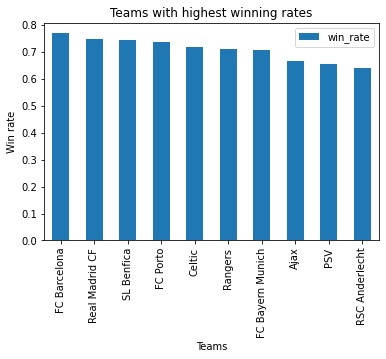

In [31]:
plt = df_top_winning_teams[['team_long_name','win_rate']].plot(kind="bar",title="Teams with highest winning rates", x='team_long_name', y='win_rate')
plt.set_xlabel('Teams')
plt.set_ylabel('Win rate')

#### The top 10 teams that had the highest winning rates are shown in the above table and chart

### Research Question 2:  Which players had the most penalties?

In [32]:
df_players.nlargest(n=10, columns=['penalties'])[['player_name','penalties']]

,player_name,penalties
149591,Rickie Lambert,96.0
40699,David Villa,92.0
113498,Mario Balotelli,92.0
122634,Michael Ballack,91.0
183672,Zlatan Ibrahimovic,91.0
37971,Dario Smoje,90.0
66178,Graham Alexander,90.0
100475,Leighton Baines,90.0
138694,Paolo Maldini,90.0
155157,Ruud van Nistelrooy,90.0


### Research Question 3: What team attributes lead to the most victories?

array([[<AxesSubplot:xlabel='win_rate', ylabel='win_rate'>,
        <AxesSubplot:xlabel='buildUpPlaySpeed', ylabel='win_rate'>,
        <AxesSubplot:xlabel='buildUpPlayPassing', ylabel='win_rate'>,
        <AxesSubplot:xlabel='chanceCreationPassing', ylabel='win_rate'>,
        <AxesSubplot:xlabel='chanceCreationCrossing', ylabel='win_rate'>,
        <AxesSubplot:xlabel='chanceCreationShooting', ylabel='win_rate'>,
        <AxesSubplot:xlabel='defencePressure', ylabel='win_rate'>,
        <AxesSubplot:xlabel='defenceAggression', ylabel='win_rate'>,
        <AxesSubplot:xlabel='defenceTeamWidth', ylabel='win_rate'>],
       [<AxesSubplot:xlabel='win_rate', ylabel='buildUpPlaySpeed'>,
        <AxesSubplot:xlabel='buildUpPlaySpeed', ylabel='buildUpPlaySpeed'>,
        <AxesSubplot:xlabel='buildUpPlayPassing', ylabel='buildUpPlaySpeed'>,
        <AxesSubplot:xlabel='chanceCreationPassing', ylabel='buildUpPlaySpeed'>,
        <AxesSubplot:xlabel='chanceCreationCrossing', ylabel='buildUpPlay

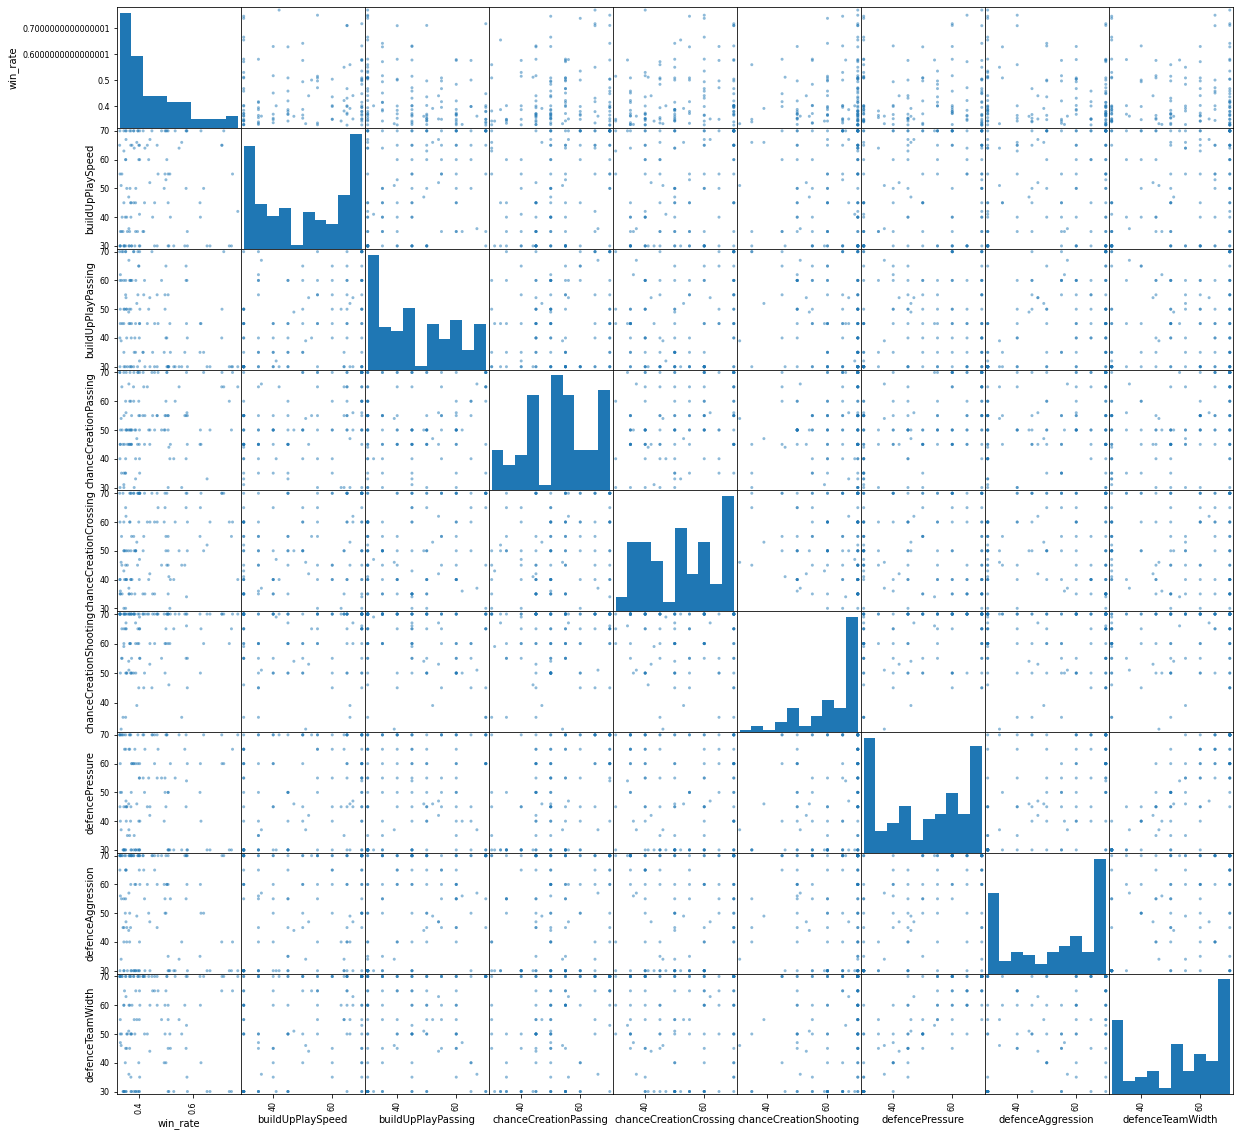

In [33]:
features = ['win_rate','buildUpPlaySpeed', 'buildUpPlaySpeedClass', 'buildUpPlayDribblingClass',
       'buildUpPlayPassing', 'buildUpPlayPassingClass',
       'buildUpPlayPositioningClass', 'chanceCreationPassing',
       'chanceCreationPassingClass', 'chanceCreationCrossing',
       'chanceCreationCrossingClass', 'chanceCreationShooting',
       'chanceCreationShootingClass', 'chanceCreationPositioningClass',
       'defencePressure',
        'defencePressureClass', 'defenceAggression',
       'defenceAggressionClass', 'defenceTeamWidth', 'defenceTeamWidthClass',
       'defenceDefenderLineClass']

# getting teams that have winning rates above average
df_winning_teams_above_average = df_win_rate.query("win_rate > win_rate.mean()")
df_winning_teams_above_average = pd.merge(left=df_winning_teams_above_average,right=df_teams,on="team_api_id", how="left")
pd.plotting.scatter_matrix(frame= df_winning_teams_above_average.loc[:,features], figsize=(20,20))

#### from the scatter matrix, one can see that as there is a direct proportional relation between the shooting chance creation and the winning rate of the team

### Research Question 4: What are the top teams that win at home?

In [34]:
def get_win_rate_top_n_teams(query, team_of_interest, n=10):
    df_queried_teams = df_matches.query(query) #quering winning side
    # getting top teams based in winning rates
    df_top_winning_teams = calculate_win_rate(df_queried_teams,f'{team_of_interest}_team_api_id').nlargest(columns="win_rate", n=n)
    return map_team_ids(df_top_winning_teams)

In [35]:
def calculate_win_rate(df_teams, team_column_selector):
    #counting the number of wins
    df_count_of_wins = df_teams[team_column_selector].value_counts().rename_axis('team_api_id').to_frame('counts')
    #counting the number of played games
    df_count_of_plays = df_matches[team_column_selector].value_counts()
    df_count_of_plays = df_count_of_plays.rename_axis('team_api_id').to_frame('counts') # sieres to DF
    # calculating win rate
    df_win_rate = df_count_of_wins / df_count_of_plays
    df_win_rate.rename(columns={"counts":"win_rate"}, inplace=True)
    return df_win_rate

In [89]:
def map_team_ids(team_ids, df_teams = df_teams):
    return pd.merge(left=team_ids,right=df_teams,on="team_api_id", how="left")

In [37]:
df_top_home_winning_teams = get_win_rate_top_n_teams(query = "home_team_goal > away_team_goal", team_of_interest='home')
df_top_home_winning_teams[['team_long_name','win_rate']]

,team_long_name,win_rate
0,FC Barcelona,0.861842
1,Real Madrid CF,0.848684
2,SL Benfica,0.822581
3,FC Porto,0.822581
4,FC Bayern Munich,0.801471
5,Celtic,0.789474
6,PSV,0.772059
7,Manchester United,0.763158
8,Ajax,0.757353
9,RSC Anderlecht,0.745283


#### The top 10 teams that had the highest winning rates at home are shown in the above table

### Research Question 5: What are the top teams that win away from home?

In [38]:
df_top_away_winning_teams = get_win_rate_top_n_teams(query = "home_team_goal < away_team_goal", team_of_interest='away')
df_top_away_winning_teams[['team_long_name','win_rate']]

,team_long_name,win_rate
0,Rangers,0.684211
1,FC Barcelona,0.677632
2,SL Benfica,0.669355
3,FC Porto,0.653226
4,Real Madrid CF,0.651316
5,Celtic,0.644737
6,FC Bayern Munich,0.617647
7,Ajax,0.573529
8,Juventus,0.560000
9,FC Basel,0.538462


#### The top 10 teams that had the highest winning rates away from home are shown in the above table

### Research Question 5: Top scoring teams

In [39]:
#getting total home goals for each team
renamed_cols_home = {'home_team_goal':'goals'}
df_home_goals = df_matches[['home_team_api_id','home_team_goal']].groupby('home_team_api_id').sum().rename(columns=renamed_cols_home)

In [40]:
#getting total away goals for each team
renamed_cols_away = {'away_team_goal':'goals'}
df_away_goals = df_matches[['away_team_api_id','away_team_goal']].groupby('away_team_api_id').sum().rename(columns=renamed_cols_away)

In [41]:
#summing home and away goals for each team and then getting top 10 teams
df_goals = df_home_goals + df_away_goals
df_goals.rename_axis('team_api_id', inplace=True)
map_team_ids(df_goals.nlargest(n=10, columns='goals'))[['team_long_name','goals']]

,team_long_name,goals
0,FC Barcelona,849
1,Real Madrid CF,843
2,Celtic,695
3,FC Bayern Munich,653
4,PSV,652
5,Ajax,647
6,FC Basel,619
7,Manchester City,606
8,Chelsea,583
9,Manchester United,582


#### The top 10 scoring teams are shown in the above table

### Research Question 6: Which foot is more prefered by soccer players?

Text(0.5, 1.0, 'Histogram of which foot is preferred by players')

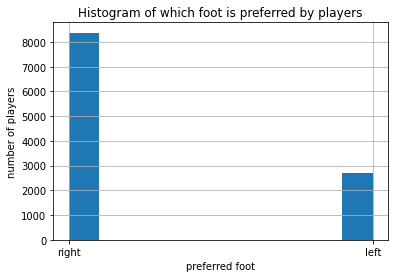

In [42]:
plt = df_players.preferred_foot.hist()
plt.set_xlabel('preferred foot')
plt.set_ylabel('number of players')
plt.set_title('Histogram of which foot is preferred by players')

#### as shown above, most players prefer the right foot

### Research Question 7: Does playing at home contributes in winning?

Text(0.5, 1.0, 'Winning team')

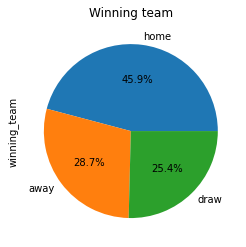

In [43]:
def who_win(match):
    if match['home_team_goal'] > match['away_team_goal']:
        return 'home'
    elif match['home_team_goal'] < match['away_team_goal']:
        return 'away'
    return 'draw'
df_matches['winning_team'] = df_matches.apply(who_win, axis=1)

plt = df_matches.winning_team.value_counts().plot.pie(autopct='%1.1f%%')
plt.set_title('Winning team')

#### As seen in the above pie chart, teams that play at home tends to win with probablity about 45.9%. On the other hand, teams that plays away tends to win with probability of 28.7% only. 

### Research Question 7: What teams improved the most over the time period?
We will know the teams that improved the most through considering the difference in the following attributes over the time perioid: buildUpPlaySpeed, buildUpPlayDribbling, and buildUpPlayPassing

In [124]:
df_teams_improvments = df_teams_with_dates.sort_values(['team_api_id','date'], ascending=True).groupby('team_api_id')[['buildUpPlaySpeed','buildUpPlayDribbling','buildUpPlayPassing']].apply(lambda team: team.iloc[-1] - team.iloc[0])

df_teams_improvments.head()

,id,team_api_id,team_fifa_api_id,team_long_name,team_short_name,date,buildUpPlaySpeed,buildUpPlaySpeedClass,buildUpPlayDribbling,buildUpPlayDribblingClass,...,chanceCreationShooting,chanceCreationShootingClass,chanceCreationPositioningClass,defencePressure,defencePressureClass,defenceAggression,defenceAggressionClass,defenceTeamWidth,defenceTeamWidthClass,defenceDefenderLineClass
955,31446,1601,874.0,Ruch Chorzów,CHO,2010-02-22 00:00:00,30.0,Slow,48.607362,Little,...,70.0,Lots,Organised,65.0,Medium,60.0,Press,50.0,Normal,Cover
956,31446,1601,874.0,Ruch Chorzów,CHO,2011-02-22 00:00:00,48.0,Balanced,48.607362,Little,...,51.0,Normal,Organised,46.0,Medium,48.0,Press,50.0,Normal,Cover
957,31446,1601,874.0,Ruch Chorzów,CHO,2012-02-22 00:00:00,53.0,Balanced,48.607362,Little,...,50.0,Normal,Organised,43.0,Medium,44.0,Press,49.0,Normal,Cover
958,31446,1601,874.0,Ruch Chorzów,CHO,2013-09-20 00:00:00,53.0,Balanced,48.607362,Little,...,50.0,Normal,Organised,43.0,Medium,44.0,Press,49.0,Normal,Cover
959,31446,1601,874.0,Ruch Chorzów,CHO,2014-09-19 00:00:00,53.0,Balanced,48.000000,Normal,...,50.0,Normal,Organised,43.0,Medium,44.0,Press,49.0,Normal,Cover
960,31446,1601,874.0,Ruch Chorzów,CHO,2015-09-10 00:00:00,47.0,Balanced,48.000000,Normal,...,50.0,Normal,Organised,43.0,Medium,44.0,Press,49.0,Normal,Cover


In [125]:
# normalizing columns
df_teams_improvments_norm = df_teams_improvments.apply(lambda x: x/x.max())

df_teams_improvments_norm.head()

,buildUpPlaySpeed,buildUpPlayDribbling,buildUpPlayPassing
team_api_id,,,
1601,0.354167,-0.021392,-0.054054
1773,0.000000,0.084270,0.000000
1957,0.750000,0.189931,-0.324324
2033,0.000000,0.471694,-0.405405
2182,0.354167,0.049049,0.135135


In [169]:
#taking means of improvements
df_teams_improvments_norm['mean'] = df_teams_improvments_norm.mean(axis = 1,skipna=True)
df_top_improved_teams = map_team_ids(df_teams_improvments_norm.nlargest(5, 'mean'))[['team_api_id','team_long_name','buildUpPlaySpeed_y','buildUpPlayDribbling_y','buildUpPlayPassing_y','mean']]

df_top_improved_teams

,team_api_id,team_long_name,buildUpPlaySpeed_y,buildUpPlayDribbling_y,buildUpPlayPassing_y,mean
0,7943,Sassuolo,30.0,48.607362,30.0,0.650222
1,8537,Livorno,30.0,48.607362,30.0,0.638049
2,208931,Carpi,32.0,46.000000,31.0,0.627900
3,9768,Sporting CP,30.0,48.607362,30.0,0.614186
4,9772,SL Benfica,30.0,48.607362,30.0,0.553091


#### As shown in the above table, the top 5 improved teams over the period based on the mean improvments in buildUpPlaySpeed, buildUpPlayDribbling, buildUpPlayPassing

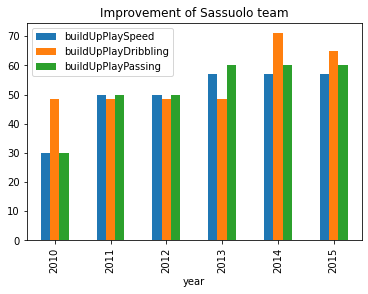

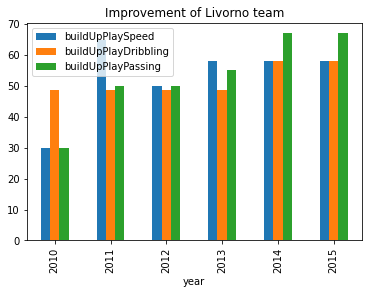

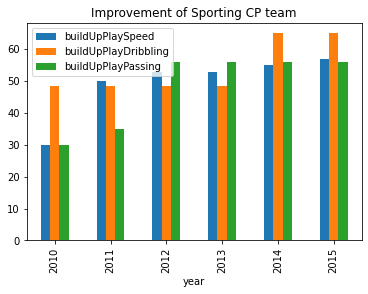

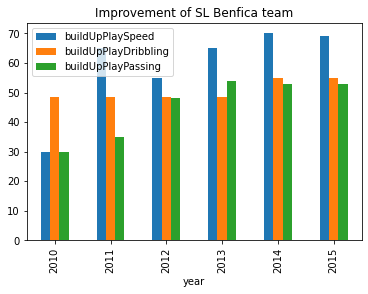

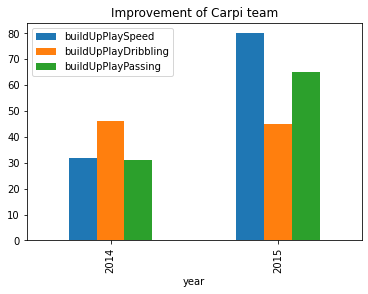

In [201]:
df_top_improved_teams_with_dates = df_teams_with_dates.loc[df_teams_with_dates['team_api_id'].isin(df_top_improved_teams['team_api_id'])]

df_top_improved_teams_with_dates['date'] =pd.to_datetime(df_top_improved_teams_with_dates['date']).dt.year

df_top_improved_teams_with_dates = df_top_improved_teams_with_dates.sort_values(['team_api_id','date'], ascending=True).groupby('team_api_id')[['date','team_long_name','buildUpPlaySpeed','buildUpPlayDribbling','buildUpPlayPassing']]

for group_name, df_group in df_top_improved_teams_with_dates:
    plt = df_group[['date','team_long_name','buildUpPlaySpeed','buildUpPlayDribbling','buildUpPlayPassing']].plot(kind="bar", x='date')
    plt.set_xlabel('year')
    team_name = df_teams[df_teams['team_api_id'] == group_name].team_long_name
    plt.set_title("Improvement of " + team_name.item() + " team")

<a id='conclusions'></a>
## Conclusions


In this report, we analyzed a soccer databse in european leagues. First, we joined the tables as needed. Then, the data is wrangled. Afterthen, we started our data analysis to answer the mentioned research questions before. We Found that Barcelona and RealMadrid were on the top of the all time winning teams. Barcelona specially was top winning team at home and the second winning team away from their home. Moreover, Barcelona was the top scoring team with 849 goals followed by Real Madrid with 843, and then followed by far away by Celtic with 695 goals. We also found that shooting change creation is one of the team attributes that lead to having a better winning rate. Moreover, we found that playing at home increases the probablity of winning. After doing a 1D analysis on players showed that most of the players prefer to use their right foot. Finally, we got the top 5 improved teams based on buildUpPlaySpeed, buildUpPlayDribbling, buildUpPlayPassing.



### Limitations

- More teams are needed to further verify our finding of which team attributes that lead to have a better winning rate.
- Not all the players have the preferred foot attribute.